<a href="https://colab.research.google.com/github/ntajxyooj/drowsiness/blob/main/Drowsiness1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import laberias ທີ່ຕ້ອງການນໍາໃຊ້

In [ ]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

# ສະແເດງປະເພດຂໍ້ມູນຮູບພາບ Dataset

In [ ]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

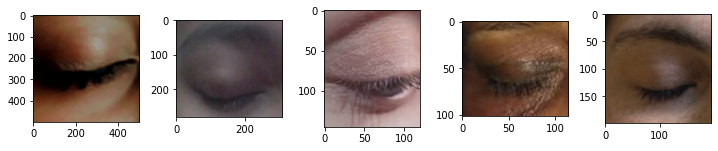

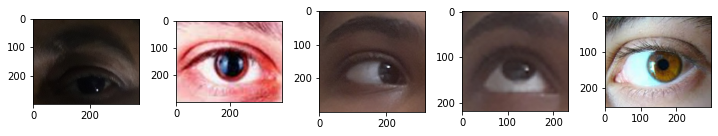

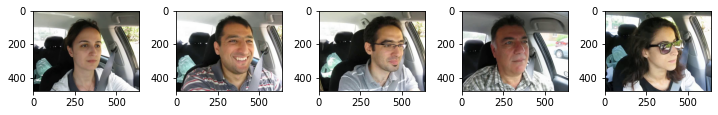

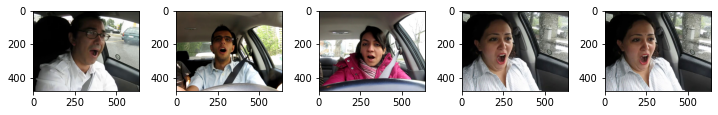

In [ ]:
data_path = '/content/drive/MyDrive/Drowsiness/data/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

In [ ]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

#ເອີ້ນຊຸດຂໍ້ມູນທີ່ຈະຝຶກ ແລະ ກວດທົດສອບ ມາໃຊ້

In [ ]:
train_data_path = '/content/drive/MyDrive/Drowsiness/data/train'
test_data_path = '/content/drive/MyDrive/Drowsiness/data/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 3404 images belonging to 4 classes.
Found 863 images belonging to 4 classes.


#ກໍານົດ Params ຂອງ Model CNN

In [ ]:
classes = 4 
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

#ຝຶກສອນ ແລະ ກວດສອບ ແມ່ແບບ (Train and validate Model)

In [ ]:
model.compile(loss ='categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [ ]:
model_path="/content/drive/MyDrive/Drowsiness/drowsiness.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [ ]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [ ]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 1.1034 - accuracy: 0.4945 
Epoch 00001: val_accuracy improved from -inf to 0.68099, saving model to /content/drive/MyDrive/Drowsiness/drowsiness.h5
26/26 [==============================] - 1260s 48s/step - loss: 1.1034 - accuracy: 0.4945 - val_loss: 1.1176 - val_accuracy: 0.6810
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7473 
Epoch 00002: val_accuracy improved from 0.68099 to 0.84375, saving model to /content/drive/MyDrive/Drowsiness/drowsiness.h5
26/26 [==============================] - 637s 25s/step - loss: 0.5492 - accuracy: 0.7473 - val_loss: 0.4442 - val_accuracy: 0.8438
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.8004 
Epoch 00003: val_accuracy improved from 0.84375 to 0.88411, saving model to /content/drive/MyDrive/Drowsiness/drowsiness.h5
26/26 [==============================] - 642s 25s/step - loss: 0.4100 - accuracy: 0

#ສະແດງຜົນການຝຶກ ແລະ ທົດສອບ ອອກມາເປັນ Graphcs

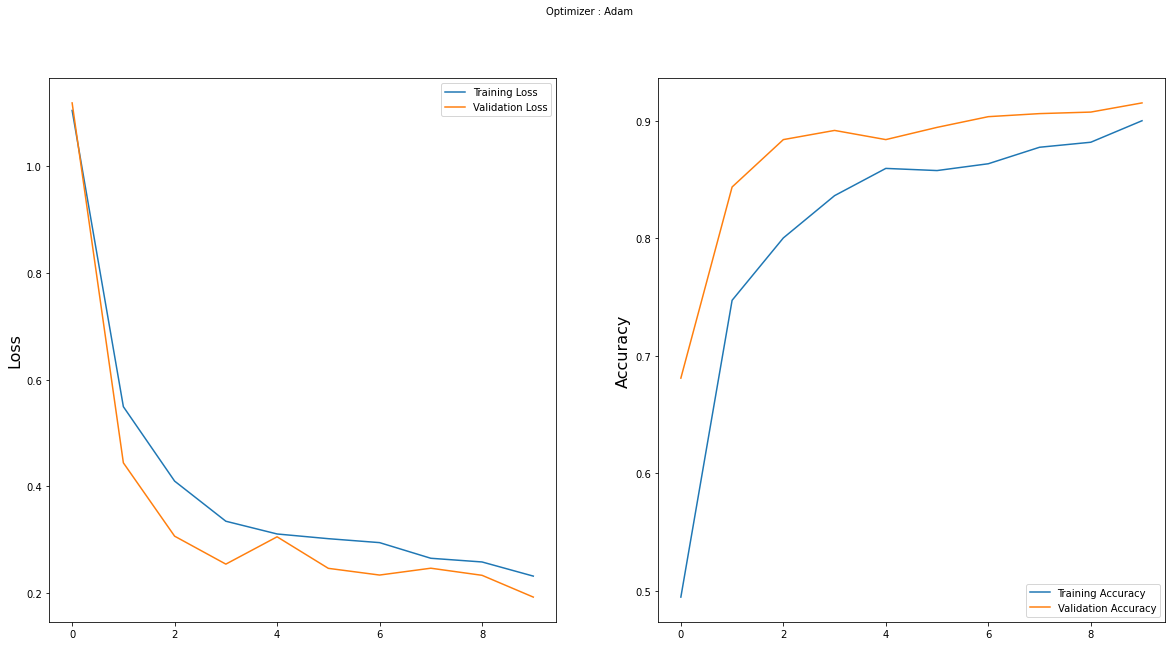

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pred = model.evaluate(test_set)
print(f'Test Set Accuracy: {pred[1]}')
print(f'Test Set Loss: {pred[0]}')

7/7 [==============================] - 99s 14s/step - loss: 0.2135 - accuracy: 0.9131
Test Set Accuracy: 0.9130938649177551
Test Set Loss: 0.21346677839756012


In [ ]:
ypred = model.predict(test_set)
ypred1 = np.argmax(ypred, axis=1)
ypred2 = np.argmax(ypred, axis=1)

In [ ]:

#Y_test_pred = np.argmax(test_set, axis=1)
for i in range(100):
  ypred2[i]=0
print(classification_report(ypred2, ypred1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       394
           1       0.90      1.00      0.95       205
           2       0.90      1.00      0.95       159
           3       0.79      1.00      0.88       105

    accuracy                           0.92       863
   macro avg       0.90      0.96      0.92       863
weighted avg       0.93      0.92      0.92       863



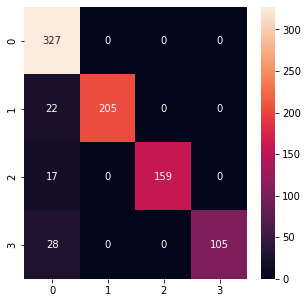

In [ ]:
matrix = confusion_matrix(ypred1, ypred2)
df_cm = pd.DataFrame(matrix, index=[0, 1,2,3], columns=[0, 1,2,3])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')